# Gesture caption

In [112]:
import numpy as np
import pandas as pd
import sys
import signal
import os
from scipy.stats import skew, kurtosis, entropy
from sklearn.utils.multiclass import unique_labels

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
pd.__version__

u'0.24.2'

In [129]:
## function to visualize confusion matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Read data

In [3]:
## Function to visualize processing progress

In [4]:
def progress_print(length):
    k, perc = progress_print.k, progress_print.perc
    s = "Processing records"
    koef = int(length / 20) 
    max_k = int(length/koef)
    if perc % koef == 0:
        st = s + "\t|" + k * "==" +">"+ (max_k - k) * "--" +"|" + str(int(perc * 100/length) + 1) + "%"
        sys.stdout.write('\r' + st)
        progress_print.k += 1
    if perc == length - 1:
        st = s + "\t|" + k * "==" +">"+ (max_k - k) * "--" +"|" + str(int(perc * 100/length) + 1) + "%"
        sys.stdout.write('\r' + st)
        progress_print.k += 1
    progress_print.perc += 1

In [5]:
## Function to read tags

In [6]:
def read_labels(file_rec):
    tags = []
    with open(file_rec, 'r') as infile:
        infile.readline()
        for i in xrange(len(data[-1]) - 1):
            t = infile.readline().split('\t')[-1].strip()
            tags.append(t)
    return tags

In [7]:
directs = ['T','AX','AY','AZ','HX','HY','HZ','MX', 'MY', 'MZ', 'Temp', 'Move']
path = './moves2018/data/records/'
records_names = os.listdir(path)

In [8]:
## Read records from file

In [9]:
data, labels = [], []
progress_print.perc, progress_print.k, length = 0, 0, len(records_names)# To visualize processing
for file_rec in records_names: 
    progress_print(length)
    data.append(np.genfromtxt(path + file_rec, delimiter='\t'))
    labels.append(read_labels(path + file_rec))

Processing records	|==========================================>|100%

In [10]:
## Create a DataFrame for each record

In [11]:
df_records = []
progress_print.perc, progress_print.k, length = 0, 0, len(data)# To visualize processing
for i in range(len(data)):
    progress_print(length)
    dat = pd.DataFrame(data[i][1:], columns = directs)
    dat['Move'] = labels[i]
    df_records.append(dat)

Processing records	|==========================================>|100%

## Some statistiques of one entire signal 

In [12]:
df_records[0].head(10)

,T,AX,AY,AZ,HX,HY,HZ,MX,MY,MZ,Temp,Move
0,301.75870,-1.916455,5.349805,7.933789,-0.135022,-0.280697,-0.268447,0.0,0.0,0.0,58.418755,none
1,301.76470,-1.839893,5.407227,8.036670,-0.148871,-0.276702,-0.272974,0.0,0.0,0.0,58.418755,none
2,301.77072,-1.823145,5.476612,8.051025,-0.167513,-0.248739,-0.281496,0.0,0.0,0.0,58.418755,none
3,301.77673,-1.835107,5.514893,8.067774,-0.189351,-0.212254,-0.290551,0.0,0.0,0.0,58.418755,none
4,301.78275,-1.732227,5.610596,8.139551,-0.213319,-0.214917,-0.298008,0.0,0.0,0.0,58.418755,none
5,301.78876,-1.591065,5.486182,7.972071,-0.245011,-0.249272,-0.307062,0.0,0.0,0.0,58.418755,none
6,301.79477,-1.619775,5.443115,8.103663,-0.274838,-0.252734,-0.311856,0.0,0.0,0.0,58.418755,none
7,301.80078,-1.516895,5.579492,8.230469,-0.297209,-0.245277,-0.316117,0.0,0.0,0.0,58.418755,none
8,301.80680,-1.547998,5.847461,8.084521,-0.324906,-0.243679,-0.311856,0.0,0.0,0.0,58.418755,none
9,301.81280,-1.624561,5.993408,7.881153,-0.348874,-0.229564,-0.309193,0.0,0.0,0.0,58.418755,none


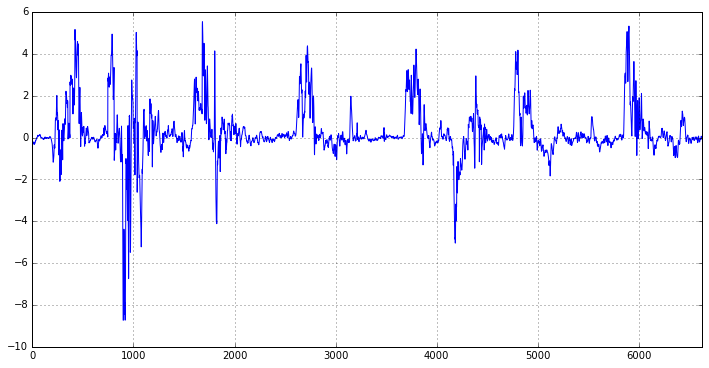

In [13]:
df_records[0].HY.plot(figsize=(12,6))
plt.grid()

In [14]:
a = df_records[0].HY.describe()
a

count    6623.000000
mean        0.253244
std         1.266545
min        -8.726380
25%        -0.164583
50%         0.018642
75%         0.434628
max         5.535114
Name: HY, dtype: float64

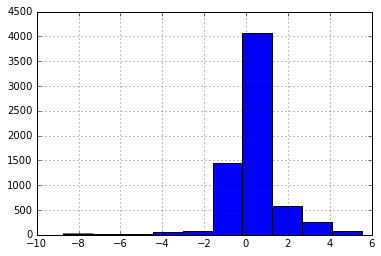

In [15]:
df_records[0].HY.hist()

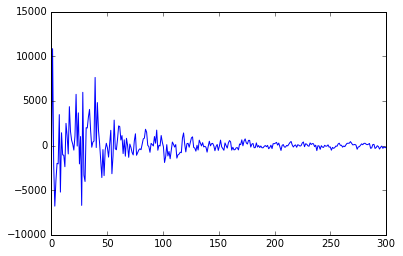

In [16]:
xx = np.real(np.fft.rfft(df_records[14].AX.values))[:300]
yy = np.linspace(0, len(xx), len(xx), endpoint=True)
plt.plot(yy,xx)

In [17]:
yy

array([  0.        ,   1.00334448,   2.00668896,   3.01003344,
         4.01337793,   5.01672241,   6.02006689,   7.02341137,
         8.02675585,   9.03010033,  10.03344482,  11.0367893 ,
        12.04013378,  13.04347826,  14.04682274,  15.05016722,
        16.05351171,  17.05685619,  18.06020067,  19.06354515,
        20.06688963,  21.07023411,  22.0735786 ,  23.07692308,
        24.08026756,  25.08361204,  26.08695652,  27.090301  ,
        28.09364548,  29.09698997,  30.10033445,  31.10367893,
        32.10702341,  33.11036789,  34.11371237,  35.11705686,
        36.12040134,  37.12374582,  38.1270903 ,  39.13043478,
        40.13377926,  41.13712375,  42.14046823,  43.14381271,
        44.14715719,  45.15050167,  46.15384615,  47.15719064,
        48.16053512,  49.1638796 ,  50.16722408,  51.17056856,
        52.17391304,  53.17725753,  54.18060201,  55.18394649,
        56.18729097,  57.19063545,  58.19397993,  59.19732441,
        60.2006689 ,  61.20401338,  62.20735786,  63.21

## Create database by windows

In [18]:
## Make database with windows :
## X - raw input data
## y - 0 if there is a change in action, 1- if there is no change

In [57]:
def cutting_in_windows(win_len, overlap, df, X, y):    
    # Cut dataFrame in windows according to given parametres
    start = df['T'].values[0]
    while (start + win_len < df['T'].values[-1]):
        df_win = df[(df['T'] >= start) & (df['T'] < start + win_len)]
        if len(df_win) < 10 :
            start += overlap
            continue
        # Firstly, find where we have changes in activity : 
        # - find all indexes where move is equal to 'none' and where it's equal to some geste
        ind_none = df_win.index[(df_win['Move'] == 'none')].tolist() 
        ind_geste = df_win.index[(df_win['Move'] != 'none')].tolist()

        # If both of the lists are not empty we have both of actions in this interval
        if (len(ind_none) >= len(df_win['Move'])/3) and (len(ind_geste) >= len(df_win['Move'])/3) :
            y.append(1) #if (min(change, len(df_win)-change) > len(df_win) / 6) else y.append(0)         
        else:
            y.append(0)
        X.append(df_win.drop(['T','Move'], axis=1))
        
        start += overlap
    return

In [58]:
def create_database(win_len, overlap, df_records):
    X, y = [], []
    progress_print.perc, progress_print.k, length = 0, 0, len(df_records)# To visualize processing
    for record in df_records:
        progress_print(length)
        cutting_in_windows(win_len, overlap, record[['T','AX','AY','AZ','HX','HY','HZ','Move']], X, y)
    return X, y        

In [59]:
win_len = 2
overlap = 0.5

In [60]:
X1, y1 = create_database(win_len, overlap, df_records)

Processing records	|==========================================>|100%

In [61]:
def print_intervals(X, y):
    for i in range(len(data)):
        print(y[i], X[i]['T'].values[0], X[i]['T'].values[-1])
    return

In [62]:
print 'Length of X_data = '+ str(len(X1))
print 'Length of y_data = '+ str(len(y1))

Length of X_data = 37400
Length of y_data = 37400


## Computing statistical features

In [63]:
import time
from sklearn.decomposition import PCA

In [64]:
X1[0].describe()

,AX,AY,AZ,HX,HY,HZ
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,-2.013106,4.871573,8.344294,-0.306149,0.008471,-0.208725
std,0.713232,1.072993,0.509715,0.518132,0.497909,0.350073
min,-4.890430,1.160400,7.601221,-1.657285,-1.180313,-1.143029
25%,-2.018738,4.928711,8.084521,-0.351471,-0.183159,-0.304799
50%,-1.884155,5.138062,8.219703,-0.057258,-0.022371,-0.040480
75%,-1.716077,5.383899,8.351294,0.011851,0.060187,-0.005060
max,-0.291895,6.983936,10.288086,0.118511,2.012018,0.244212


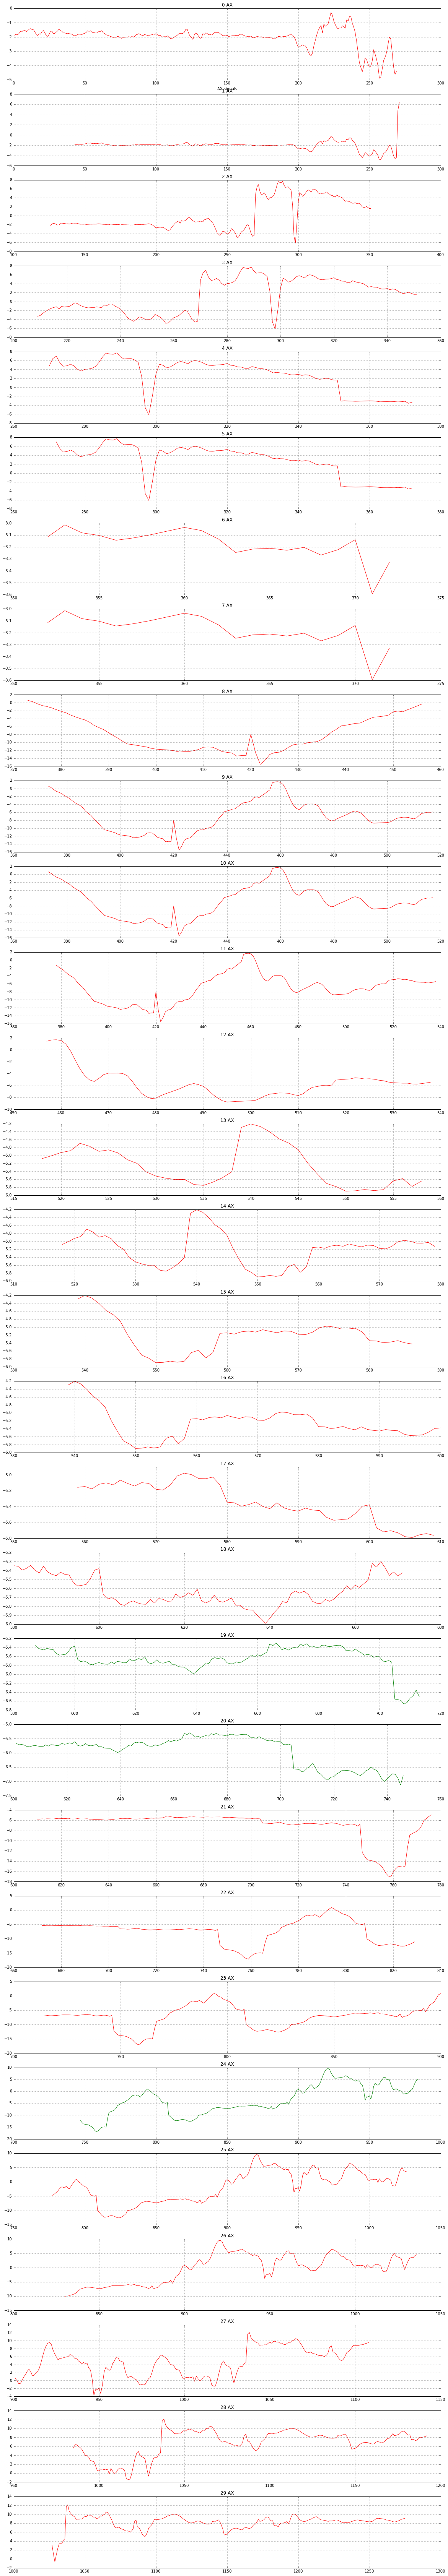

In [65]:
fig, axes = plt.subplots(len(y1[:30]), figsize=(20, 120))

ax = axes.ravel()
for i in range(len(y1[:30])):
    if y1[i] == 0:
        col = 'r'
    else: 
        col = 'g'
    ax[i].plot(X1[i].AX, color=col)
    ax[i].grid()
    ax[i].set_title(str(i)+' AX')

ax[0].set_xlabel("AX signals")

In [66]:
def hjorth(a):
    first_deriv = np.diff(a)
    second_deriv = np.diff(a,2)

    var_zero = np.mean(a ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)

    activity = var_zero
    morbidity = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / morbidity

    return [activity, morbidity, complexity]

In [67]:
def compute_features(X):
    features = []
    progress_print.perc, progress_print.k, length = 0, 0, len(X)# To visualize processing
    now = time.time()
    for i in range(len(X)):
        progress_print(length)
        mn, std, sk, kurt = list(np.mean(X[i])), list(np.std(X[i])), list(skew(X[i])), list(kurtosis(X[i]))
        # ent = list(entropy(X[i]))
        norm_a = np.mean(X[i].AX ** 2 + X[i].AY ** 2 + X[i].AZ ** 2)
        norm_h = np.mean(X[i].HX ** 2 + X[i].HY ** 2 + X[i].HZ ** 2)
        # activity, complexity, morbidity in hjorth()
        hjorth_params = hjorth(X[i].AX)+hjorth(X[i].AY)+hjorth(X[i].AZ)+hjorth(X[i].HX)+hjorth(X[i].HY)+hjorth(X[i].HZ)
        cross_zero = list(X[i].apply(lambda x: len(np.where(np.diff(np.sign(x)))[0]), axis=0))
        fr_AX, fr_HX = list(np.real(np.fft.rfft(X[i].AX.values))[:10]), list(np.real(np.fft.rfft(X[i].HX.values))[:10])
        fr_AY, fr_HY = list(np.real(np.fft.rfft(X[i].AY.values))[:10]), list(np.real(np.fft.rfft(X[i].HY.values))[:10])
        fr_AZ, fr_HZ = list(np.real(np.fft.rfft(X[i].AZ.values))[:10]), list(np.real(np.fft.rfft(X[i].HZ.values))[:10])
        features.append(mn+std+sk+kurt+[norm_a,norm_h]+hjorth_params+cross_zero+fr_AX+fr_HX+fr_AY+fr_HY+fr_AZ+fr_HZ)
    later = time.time()
    difference = int(later - now)
    print('\nTotal time ' + str(difference))
    print('Time per data ' + str(float(difference)/len(X)))
    return features 

In [68]:
features = compute_features(X1)

Processing records	|========================================>|100%
Total time 244
Time per data 0.00652406417112


In [71]:
#from tempfile import TemporaryFile
#outfile_features = TemporaryFile()
#np.save(outfile_features, features)

#   'ent_AX','ent_AY','ent_AZ','ent_HX','ent_HY','ent_HZ',

In [72]:
features_names = ['mn_AX','mn_AY','mn_AZ','mn_HX','mn_HY','mn_HZ',
                  'std_AX','std_AY','std_AZ','std_HX','std_HY','std_HZ',
                  'skew_AX','skew_AY','skew_AZ','skew_HX','skew_HY','skew_HZ',
                  'kurt_AX','kurt_AY','kurt_AZ','kurt_HX','kurt_HY','kurt_HZ',
                  'norm_A','norm_H',
                  'hjorth_act_AX','hjorth_compl_AX','hjorth_morb_AX',
                  'hjorth_act_AY','hjorth_compl_AY','hjorth_morb_AY',
                  'hjorth_act_AZ','hjorth_compl_AZ','hjorth_morb_AZ',
                  'hjorth_act_HX','hjorth_compl_HX','hjorth_morb_HX',
                  'hjorth_act_HY','hjorth_compl_HY','hjorth_morb_HY',
                  'hjorth_act_HZ','hjorth_compl_HZ','hjorth_morb_HZ',
                  'cross_zero_AX','cross_zero_AY','cross_zero_AZ','cross_zero_HX','cross_zero_HY','cross_zero_HZ',
                  'fr_AX1', 'fr_AX2', 'fr_AX3', 'fr_AX4', 'fr_AX5', 'fr_AX6', 'fr_AX7', 'fr_AX8', 'fr_AX9', 'fr_AX10', 
                  'fr_HX1', 'fr_HX2', 'fr_HX3', 'fr_HX4', 'fr_HX5', 'fr_HX6', 'fr_HX7', 'fr_HX8', 'fr_HX9', 'fr_HX10', 
                  'fr_AY1', 'fr_AY2', 'fr_AY3', 'fr_AY4', 'fr_AY5', 'fr_AY6', 'fr_AY7', 'fr_AY8', 'fr_AY9', 'fr_AY10',
                  'fr_HY1', 'fr_HY2', 'fr_HY3', 'fr_HY4', 'fr_HY5', 'fr_HY6', 'fr_HY7', 'fr_HY8', 'fr_HY9', 'fr_HY10', 
                  'fr_AZ1', 'fr_AZ2', 'fr_AZ3', 'fr_AZ4', 'fr_AZ5', 'fr_AZ6', 'fr_AZ7', 'fr_AZ8', 'fr_AZ9', 'fr_AZ10', 
                  'fr_HZ1', 'fr_HZ2', 'fr_HZ3', 'fr_HZ4', 'fr_HZ5', 'fr_HZ6', 'fr_HZ7', 'fr_HZ8', 'fr_HZ9', 'fr_HZ10']

In [73]:
features_pos, features_neg = [], []

In [95]:
features_homogenes, y_homogenes = [], []

In [96]:
for i in range(len(y1)):
    if y1[i] == 0:
        if len(features[i]) == len(features_names) :
            features_neg.append(features[i])
        else :
            print 'Length of feature is not equal to ' + str(len(features_names)) + ' in index ' + str(i)
    else :
        if len(features[i]) == len(features_names) :
            features_pos.append(features[i])
        else :
            print 'Length of feature is not equal to ' + str(len(features_names)) + ' in index ' + str(i)
    if len(features[i]) == len(features_names) :
        features_homogenes.append(features[i])
        y_homogenes.append(y1[i])

Length of feature is not equal to 110 in index 8535
Length of feature is not equal to 110 in index 29672


In [99]:
len(y_homogenes)

37398

In [79]:
stats_pos = np.array(features_pos).T
stats_neg = np.array(features_neg).T

In [80]:
len(stats_pos)

110

In [81]:
len(features_homogenes)

37399

In [82]:
features_homogenes_transpose = np.array(features_homogenes).T

In [83]:
len(features_homogenes_transpose)

110

### Histogramm des valeurs of features

In [131]:
len(features_names)

110

Processing fr_HZ10                                                                                                                                                                                            

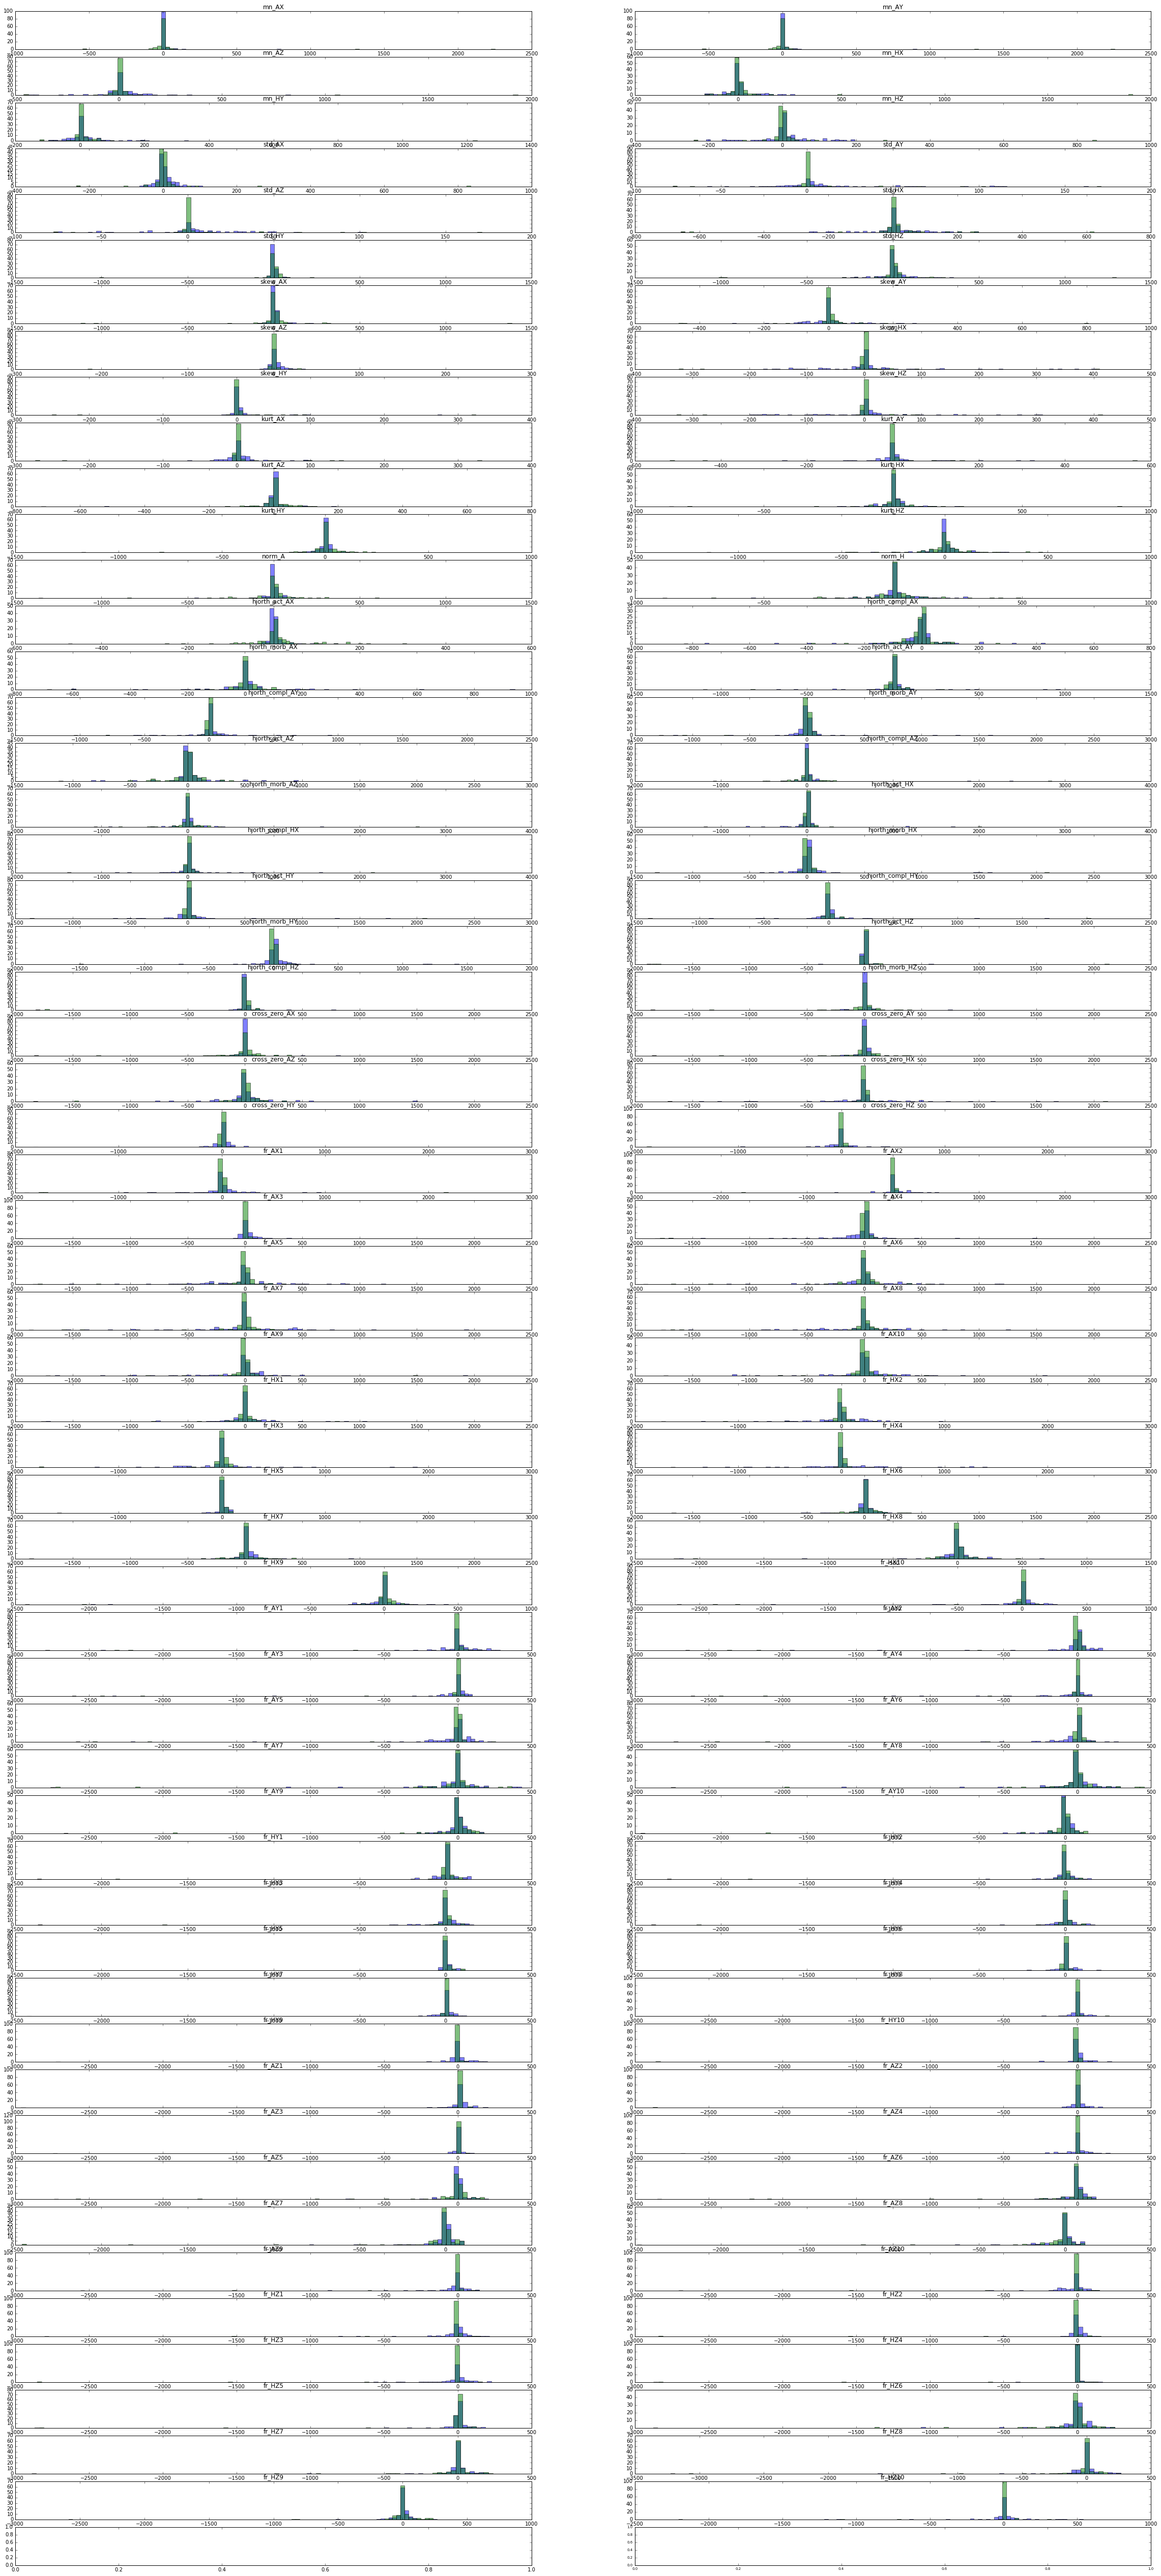

In [84]:
fig, axes = plt.subplots(len(features_names)//2+1, 2, figsize=(40, 90))

ax = axes.ravel()
for i in range(len(features_names)):
    st = 'Processing ' + str(features_names[i]) + 10 * '                  '
    sys.stdout.write('\r' + st)
    _, bins = np.histogram(features_homogenes_transpose[:, i], bins = 100)
    ax[i].hist(stats_pos[:, i], bins = bins, alpha = .5)
    ax[i].hist(stats_neg[:, i], bins = bins, alpha = .5)
    ax[i].set_title(features_names[i])
    plt.tick_params(axis='both', which='major', labelsize=7)
    plt.tick_params(axis='both', which='minor', labelsize=7)

ax[0].set_xlabel("Histogrammes of feature")

In [161]:
print(features_names[50:80])

['fr_AX1', 'fr_AX2', 'fr_AX3', 'fr_AX4', 'fr_AX5', 'fr_AX6', 'fr_AX7', 'fr_AX8', 'fr_AX9', 'fr_AX10', 'fr_HX1', 'fr_HX2', 'fr_HX3', 'fr_HX4', 'fr_HX5', 'fr_HX6', 'fr_HX7', 'fr_HX8', 'fr_HX9', 'fr_HX10', 'fr_AY1', 'fr_AY2', 'fr_AY3', 'fr_AY4', 'fr_AY5', 'fr_AY6', 'fr_AY7', 'fr_AY8', 'fr_AY9', 'fr_AY10']


In [157]:
len(['mn_AX', 'mn_AY', 'mn_AZ', 'mn_HX', 'mn_HY', 'mn_HZ', 'std_AX', 'std_AY', 'std_AZ', 'std_HX', 'std_HY', 'std_HZ', 'skew_AX', 'skew_AY', 'skew_AZ', 'skew_HX', 'skew_HY', 'skew_HZ', 'kurt_AX', 'kurt_AY', 'kurt_AZ', 'kurt_HX', 'kurt_HY', 'kurt_HZ', 'norm_A', 'norm_H', 'hjorth_act_AX', 'hjorth_compl_AX', 'hjorth_morb_AX', 'hjorth_act_AY', 'hjorth_compl_AY', 'hjorth_morb_AY', 'hjorth_act_AZ', 'hjorth_compl_AZ', 'hjorth_morb_AZ', 'hjorth_act_HX', 'hjorth_compl_HX', 'hjorth_morb_HX', 'hjorth_act_HY', 'hjorth_compl_HY', 'hjorth_morb_HY', 'hjorth_act_HZ', 'hjorth_compl_HZ', 'hjorth_morb_HZ', 'cross_zero_AX', 'cross_zero_AY', 'cross_zero_AZ', 'cross_zero_HX', 'cross_zero_HY', 'cross_zero_HZ'])

50

Processing norm_H                                                                                                                                                                                     

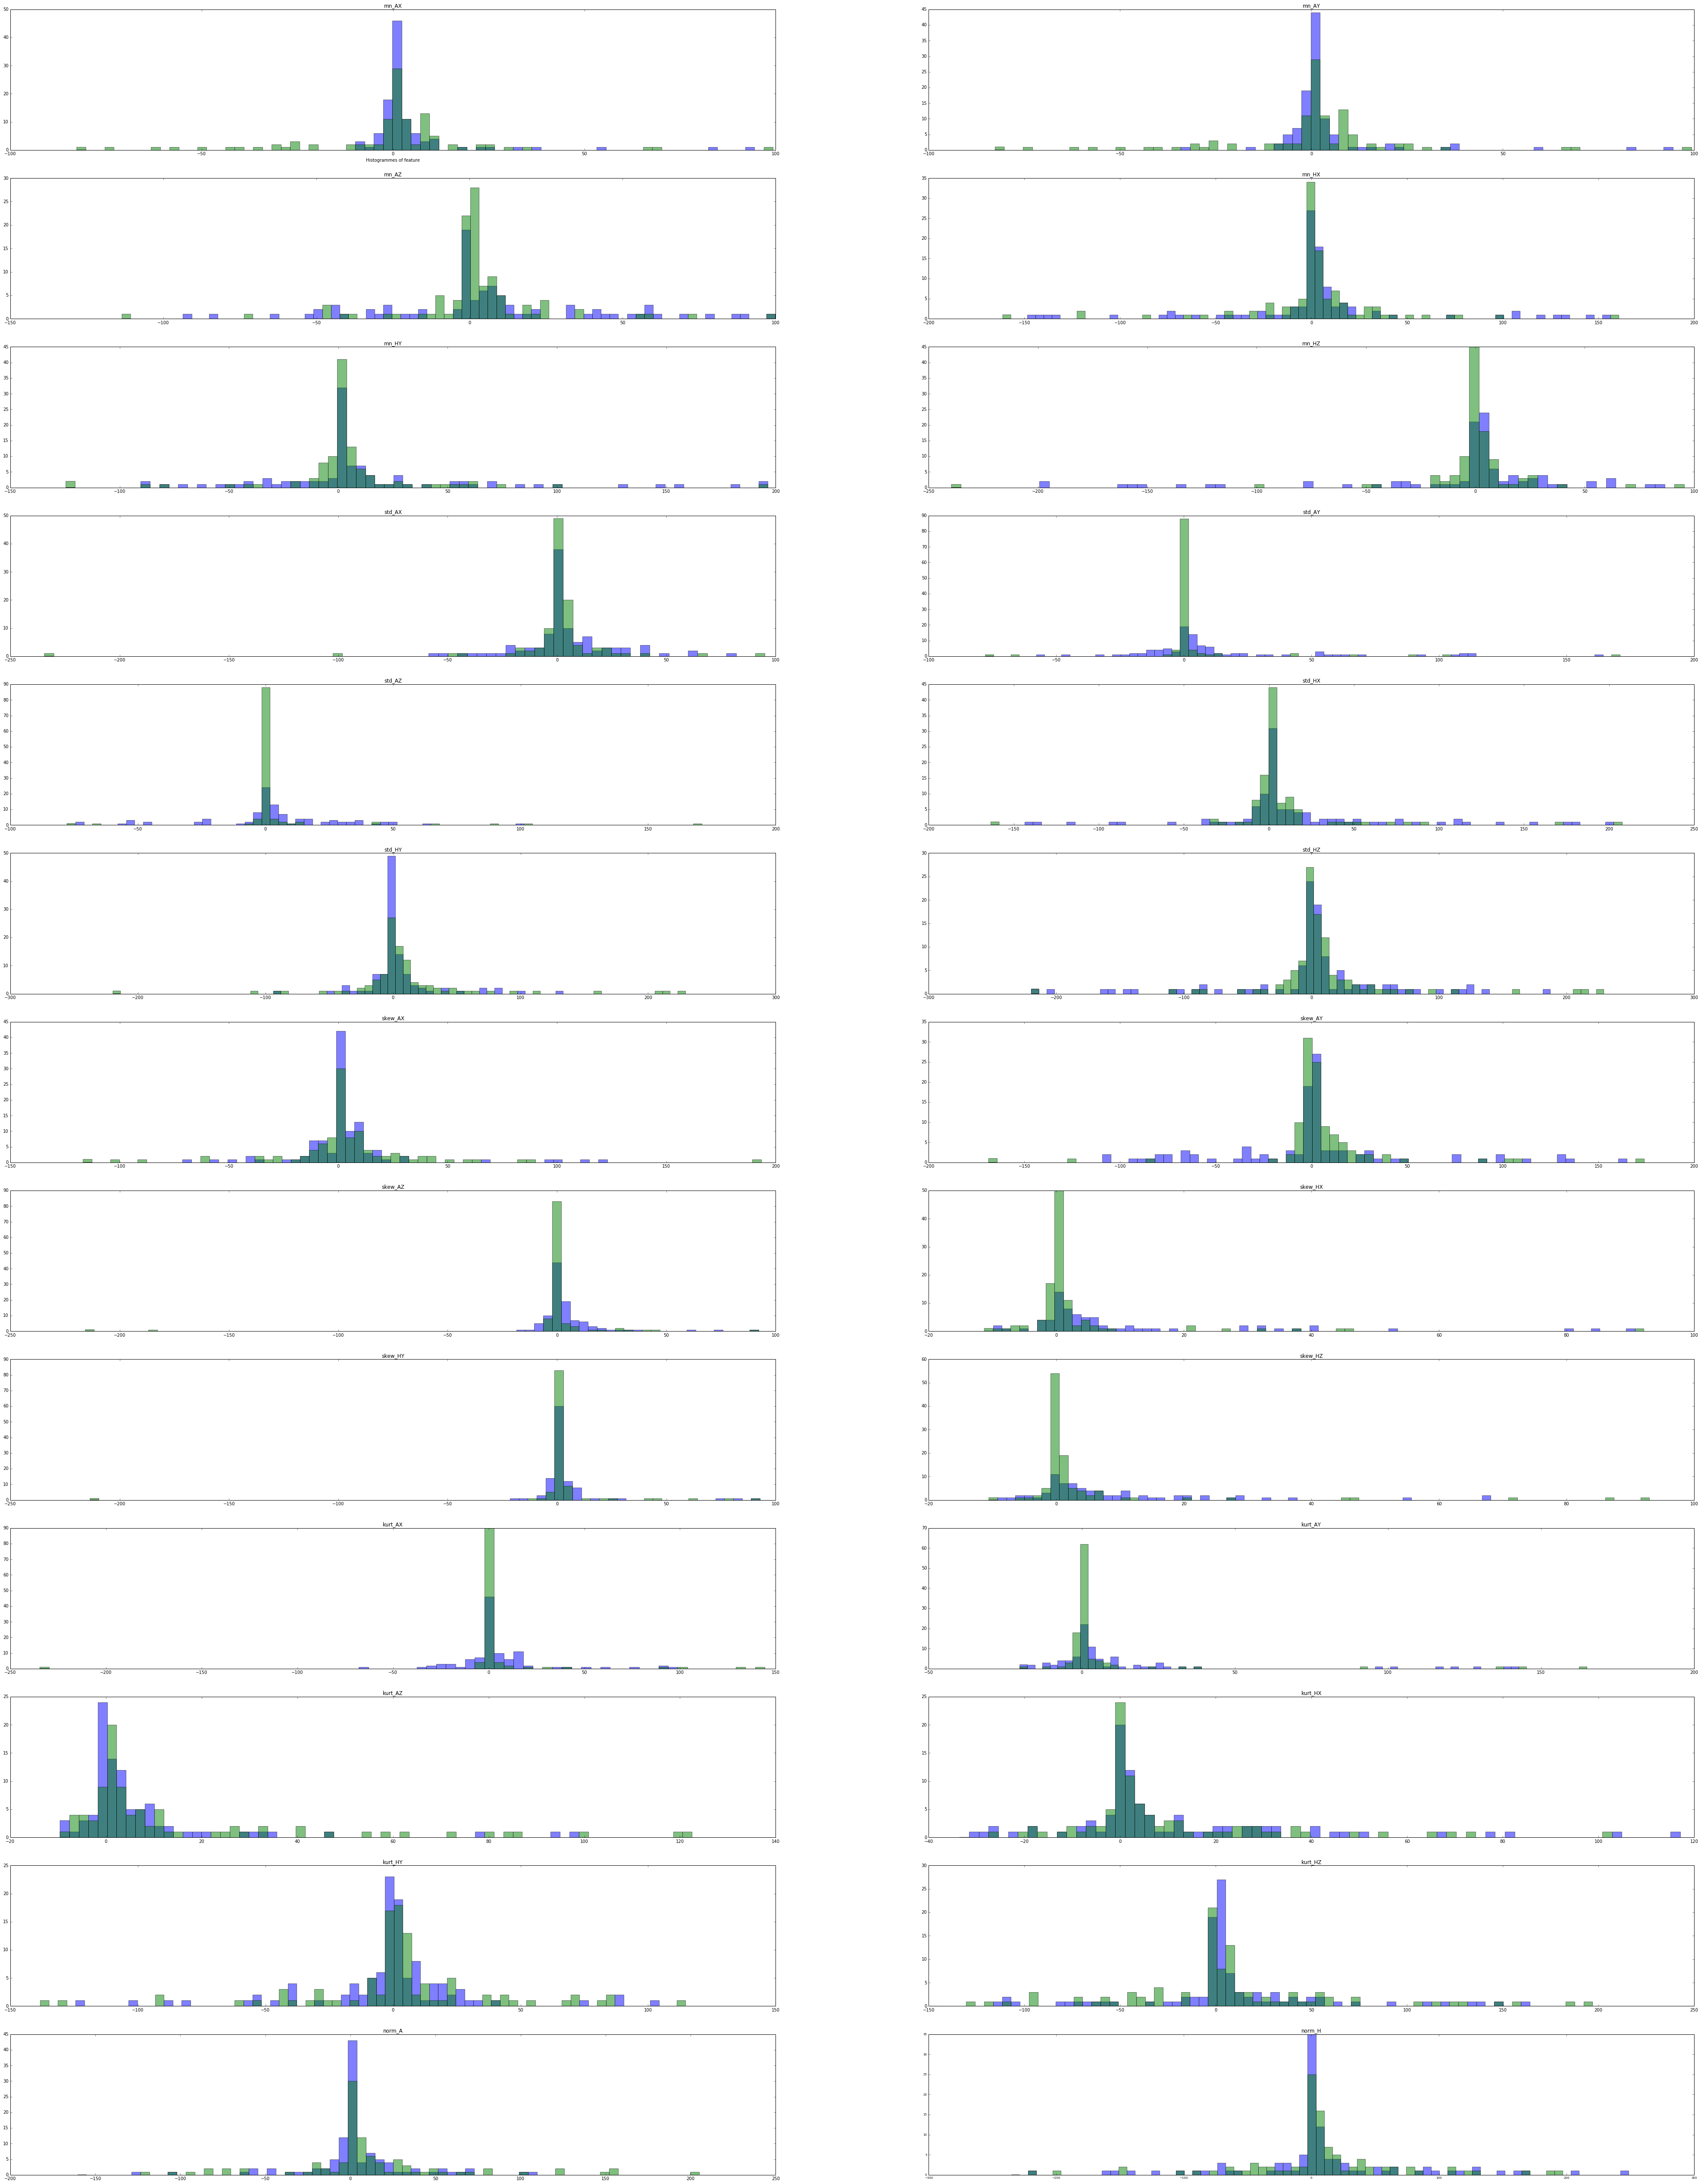

In [164]:
fig, axes = plt.subplots(len(features_names[:26])//2, 2, figsize=(70, 90))

ax = axes.ravel()
for i in range(len(features_names[:26])):
    st = 'Processing ' + str(features_names[i]) + 10 * '                  '
    sys.stdout.write('\r' + st)
    
    feat_cut = np.array(features_homogenes_transpose[:, i])
    feat_cut = feat_cut[np.all([feat_cut > -250,feat_cut < 250], axis=0)]
    _, bins = np.histogram(feat_cut, bins = 75)
    
    stats_pos_cut = np.array(stats_pos[:, i])
    stats_pos_cut = stats_pos_cut[np.all([stats_pos_cut > -250, stats_pos_cut < 250], axis=0)]
    ax[i].hist(stats_pos_cut, bins = bins, alpha = .5)
    
    stats_neg_cut = np.array(stats_neg[:, i])
    stats_neg_cut = stats_neg_cut[np.all([stats_neg_cut > -250,stats_neg_cut < 250], axis=0)]
    ax[i].hist(stats_neg_cut, bins = bins, alpha = .5)
    
    ax[i].set_title(features_names[i])
    plt.tick_params(axis='both', which='major', labelsize=7)
    plt.tick_params(axis='both', which='minor', labelsize=7)

ax[0].set_xlabel("Histogrammes of feature")

### PCA

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
PCA_number = 25

scaler = StandardScaler()
scaler.fit(features_homogenes)
features_scaled = scaler.transform(features_homogenes)

pca = PCA(n_components = PCA_number)
pca.fit(features_homogenes)
features_pca = pca.transform(features_homogenes)

### PCA visualization

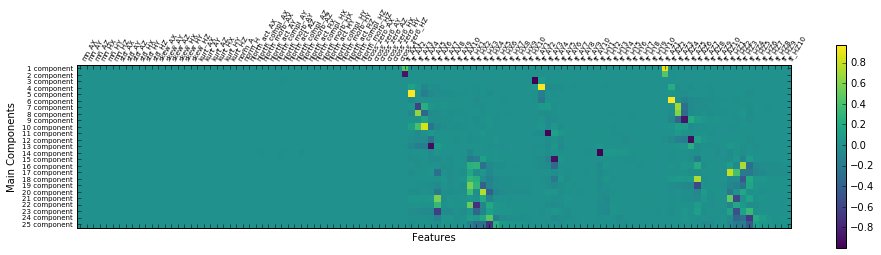

In [87]:
plt.matshow(pca.components_, cmap = 'viridis')
pca_names = []
for i in range(PCA_number):
    pca_names.append(str(i + 1) + " component")
plt.tick_params(axis='both', which='major', labelsize=7)
plt.tick_params(axis='both', which='minor', labelsize=7)
plt.yticks(range(PCA_number), pca_names)
plt.colorbar()
plt.xticks(range(len(features_names)), features_names, rotation = 60, ha = 'left')
plt.xlabel('Features')
plt.ylabel("Main Components")
plt.show()

### Random Forest 

In [88]:
import pickle
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

In [100]:
X_shuffled, y_shuffled = shuffle(features_homogenes, y_homogenes)
coef = 5.0/6.0
ind = int(len(X_shuffled) * coef)
X_train = X_shuffled[:ind]
y_train = y_shuffled[:ind]
X_test = X_shuffled[ind:]
y_test = y_shuffled[ind:]

In [101]:
tree = RandomForestClassifier(n_estimators = 60).fit(X_train, y_train)

In [102]:
print("Training score for RandomForestClassifier: {:.3f}".format(tree.score(X_train, y_train)))

Training score for RandomForestClassifier: 1.000


In [103]:
print("Training score for RandomForestClassifier: {:.3f}".format(tree.score(X_test, y_test)))

Training score for RandomForestClassifier: 0.860


In [104]:
c_m = confusion_matrix(y_test, tree.predict(X_test))

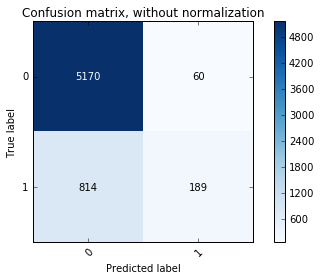

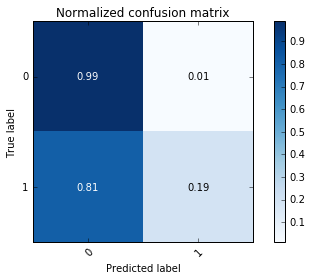

In [130]:
plot_confusion_matrix(y_test, tree.predict(X_test), classes=np.array(['0','1']), title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, tree.predict(X_test), classes=np.array(['0','1']), normalize=True, title='Normalized confusion matrix')

plt.show()